In [60]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, log_loss, accuracy_score
from sklearn.preprocessing import StandardScaler

from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc



In [61]:
run data_preprocessing.ipynb

ERROR:root:File `'data_preprocessing.ipynb.py'` not found.


In [62]:
def data_split():

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [63]:
def neural_network(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    classifier = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(70,70), random_state=1, max_iter=1500)
    
    classifier.fit(X_train, y_train)
    
    predicted_train = classifier.predict(X_train)
    predicted_test = classifier.predict(X_test)
    
    return predicted_train, predicted_test

In [64]:
def ROC_plotting(title, y_test, y_score):
    
    # Jakke
    
    n_classes = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
    plt.figure()
    lw = 2
    plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [6]:
def model_evaluation(X_train, X_test, y_train, y_test, classifier, predicted_train, predicted_test):
    print("Training set score: %f" % classifier.score(X_train, y_train))
    print("Training log-loss: %f" % log_loss(X_train, y_train))
    print(confusion_matrix(y_train,predicted_train))
    print(classification_report(y_train,predicted_train))
    
    print("Test set score: %f" % classifier.score(X_test, y_test))
    print("Test log-loss: %f" % log_loss(X_test, y_test))
    print(confusion_matrix(y_test,predicted_test))
    print(classification_report(y_test,predicted_test))

    ROC_plotting("ROC",y_test, predicted_test)

In [3]:
run data_preprocessing.ipynb

In [7]:
X,y = data_preprocessing()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
classifier = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(70,70), random_state=1, max_iter=1500)

In [51]:
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(70, 70), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [52]:
predicted_train = classifier.predict(X_train)
predicted_test = classifier.predict(X_test)

In [53]:
print("Training set score: %f" % classifier.score(X_train, y_train))


Training set score: 0.999725


In [54]:
print("Test set score: %f" % classifier.score(X_test, y_test))

Test set score: 0.996111


In [55]:
print("Test set score: %f" % accuracy_score(y_test, predicted_test))

Test set score: 0.996111


In [56]:
print(confusion_matrix(y_test,predicted_test))

[[55653    89]
 [  131   699]]


In [57]:
print(classification_report(y_test,predicted_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     55742
         1.0       0.89      0.84      0.86       830

    accuracy                           1.00     56572
   macro avg       0.94      0.92      0.93     56572
weighted avg       1.00      1.00      1.00     56572



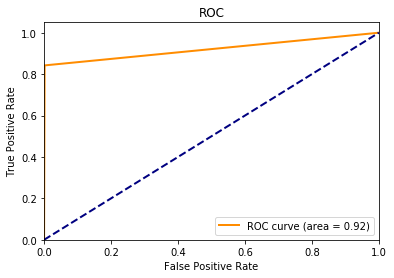

In [58]:
ROC_plotting("ROC",y_test, predicted_test)

In [59]:
log_loss(y_test, predicted_test)

0.13431736496944943